In [34]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [35]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data) 

In [7]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    market_data_scaled, 
    columns=[
        'price_change_percentage_24h', 
        'price_change_percentage_7d', 
        'price_change_percentage_14d', 
        'price_change_percentage_30d',
        'price_change_percentage_60d', 
        'price_change_percentage_200d', 
        'price_change_percentage_1y'
    ]
)





# Set the coinid column as index
index=df_market_data.index

# Display sample data
df_market_data_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351
9,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [9]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia 

for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using df_market_data_scaled
    kmeans.fit(df_market_data_scaled)
    
    # 3. Append the model.inertia_ to the inertia_values list
    inertia_values.append(kmeans.inertia_)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [16]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data = pd.DataFrame({
    "k": k_values,
    "inertia": inertia_values
})

In [18]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow_data.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xticks=k_values,
    xlabel='Number of clusters (k)',
    ylabel='Inertia'
)

elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

It appears that the best value for k is (4) based on the curve inflection.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [19]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0)

In [20]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [22]:
# Create a copy of the DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

In [24]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_copy['Predicted_Cluster'] = crypto_clusters

# Display sample data
df_market_data_scaled_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predicted_Cluster
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [25]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Predicted_Cluster',  # Color points by the predicted cluster
    hover_cols=['coin_id'],  # Add the cryptocurrency name to the hover information
    title='Cryptocurrency Clusters',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    size=100,  # Adjust point size if needed
    width=800,
    height=600
)

scatter_plot

:NdOverlay   [Predicted_Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [26]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [28]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_components = pca.fit_transform(df_market_data_scaled)

# Convert the resulting array into a DataFrame for easier handling
df_pca = pd.DataFrame(
    data=pca_components, 
    columns=['PC1', 'PC2', 'PC3'],  
    index=df_market_data_scaled.index  
)

# View the first five rows of the DataFrame. 
df_pca.head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [29]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
explained_variance

for i, variance in enumerate(explained_variance, start=1):
    print(f"Principal Component {i} explains {variance:.2%} of the variance.")



Principal Component 1 explains 37.20% of the variance.
Principal Component 2 explains 34.70% of the variance.
Principal Component 3 explains 17.60% of the variance.


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

Total explained variance by the three principal components is 99.50%

In [30]:
# Create a new DataFrame with the PCA data.
df_pca_data = pd.DataFrame(
    data=pca_components, 
    columns=['PC1', 'PC2', 'PC3']
)


# Copy the crypto names from the original data
df_pca_data['coin_id'] = df_market_data_scaled_copy.index

# Set the coinid column as index
df_pca_data.set_index('coin_id', inplace=True)

# Display sample data
df_pca_data.head()

# Display sample data


,PC1,PC2,PC3
coin_id,,,
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11


In [31]:
# Create an empty list to store the inertia values
k_values = list(range(1, 12))

# Display the list to verify
print(k_values)


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
# Initialize an empty list to store inertia values
inertia_list = []

# Create a list of k-values from 1 to 11
k_values = list(range(1, 12))

# For loop to compute inertia for each value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using df_pca_data
    kmeans.fit(df_pca_data)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_list.append(kmeans.inertia_)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [32]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia_list
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame to verify
df_elbow.head()


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747


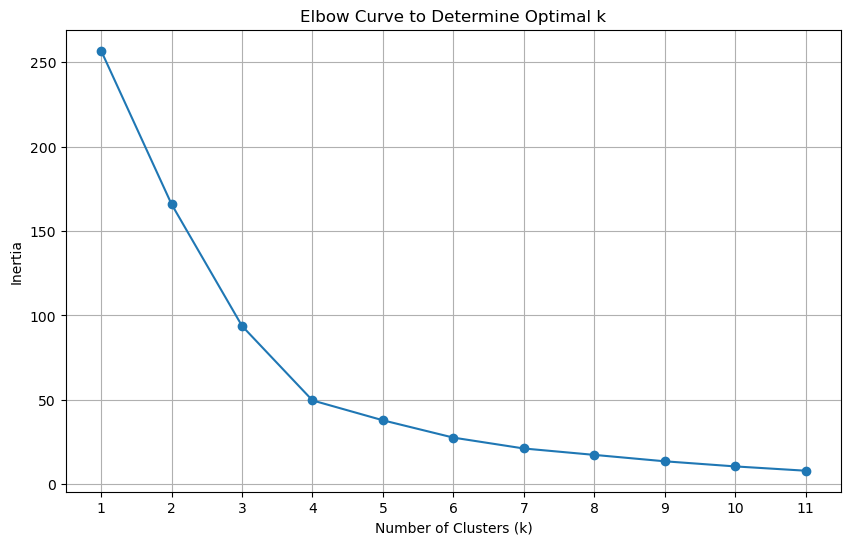

In [36]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])  # Ensure that all k values are shown on the x-axis
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

It appears that the best value for k when using the PCA data is (5). The k value from the original data was (4).

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [37]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Replace 4 with the optimal k determined from the Elbow curve
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

In [39]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca_data)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [40]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.
predicted_clusters = kmeans_model.predict(df_pca_data)

# Print the resulting array of cluster values
print(predicted_clusters)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [41]:
# Create a copy of the DataFrame with the PCA data
df_pca_data_copy = df_pca_data.copy()

# Display the first few rows of the copied DataFrame to verify
df_pca_data_copy.head()

# Add a new column to the DataFrame with the predicted clusters


# Display sample data
df_pca_data_copy['Predicted_Cluster'] = predicted_clusters

# Display the first few rows of the DataFrame to verify
df_pca_data_copy.head()


,PC1,PC2,PC3,Predicted_Cluster
coin_id,,,,
0,-0.600667,0.842760,0.461595,0
1,-0.458261,0.458466,0.952877,0
2,-0.433070,-0.168126,-0.641752,3
3,-0.471835,-0.222660,-0.479053,3
4,-1.157800,2.041209,1.859715,0


In [42]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_data_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Predicted_Cluster',  # Color points by the predicted cluster
    hover_cols=['coin_id'],  # Add the cryptocurrency name to the hover information
    title='Cryptocurrency Clusters by PCA',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2',
    size=100,  # Adjust point size if needed
    width=800,
    height=600
)

# Display the plot
scatter_plot


:NdOverlay   [Predicted_Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [44]:
# Composite plot to contrast the Elbow curves
elbow_plot_original = df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve - Original Data',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    line_width=2,
    color='blue',
    label='Original Data'
)

# Create Elbow curve for PCA data
inertia_list_pca = []

# For loop to compute inertia for each value of k using the PCA data
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(df_pca_data)
    inertia_list_pca.append(kmeans_pca.inertia_)

# Create a DataFrame for the Elbow curve data using PCA data
df_elbow_pca = pd.DataFrame({
    "k": k_values,
    "inertia": inertia_list_pca
})



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [45]:
# Composite plot to contrast the clusters
# Create Elbow curve for original data
elbow_plot_original = df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve Comparison',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    line_width=2,
    color='blue',
    label='Original Data'
)

# Create Elbow curve for PCA data
elbow_plot_pca = df_elbow_pca.hvplot.line(
    x='k',
    y='inertia',
    line_width=2,
    color='red',
    label='PCA Data'
)

# Combine the plots into a composite plot
composite_plot = elbow_plot_original * elbow_plot_pca

# Display the composite plot
composite_plot

:Overlay
   .Curve.Original_Data :Curve   [k]   (inertia)
   .Curve.PCA_Data      :Curve   [k]   (inertia)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 

When done correctly, reducing the number of features can lead to faster, more interpretable, and sometimes even more accurate clustering results. However, care must be taken to avoid losing important information, which could lead to oversimplified and less meaningful clusters.